In [1]:
import os
import sys
import glob
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Local modules
import nexrad
import cinterp

# iRadar
sys.path.append(os.path.expanduser('~/Developer/iradar/python'))
import iradar

# Read a NEXRAD Sweep

In [2]:
files = glob.glob(os.path.expanduser('~/Downloads/88d/KDDC/*V06'))
filename = files[0]

azimuth_count = 360
range_count = 800

sweeps = nexrad.read(filename)

z = sweeps['z'][0, :, :range_count]

az = sweeps['aa'][0, :]
rr = 1.0e-3 * sweeps['rr'][:range_count]

roll_amount = int(az[0] * 180.0 / np.pi)
z_rolled = np.roll(z, roll_amount, axis=0)

In [3]:
%matplotlib inline
plt.rcParams['axes.facecolor'] = 'black'
zmap = iradar.colormap.zmap()
cmap = matplotlib.colors.LinearSegmentedColormap.from_list('colors', zmap[:, :3], N=len(zmap))

# Cell Indices

In [4]:
cells = cinterp.data.kddc_cells2

# Calling `cinterp` of the CInterp Module

In [5]:
z_interp = cinterp.cinterp(z, az, rr, cells)

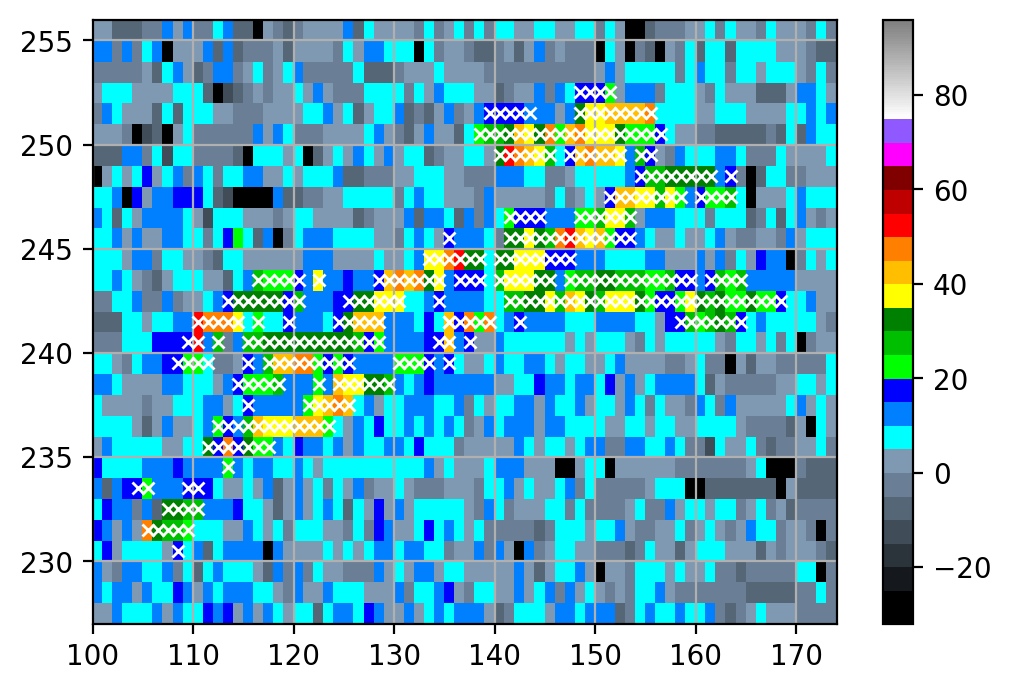

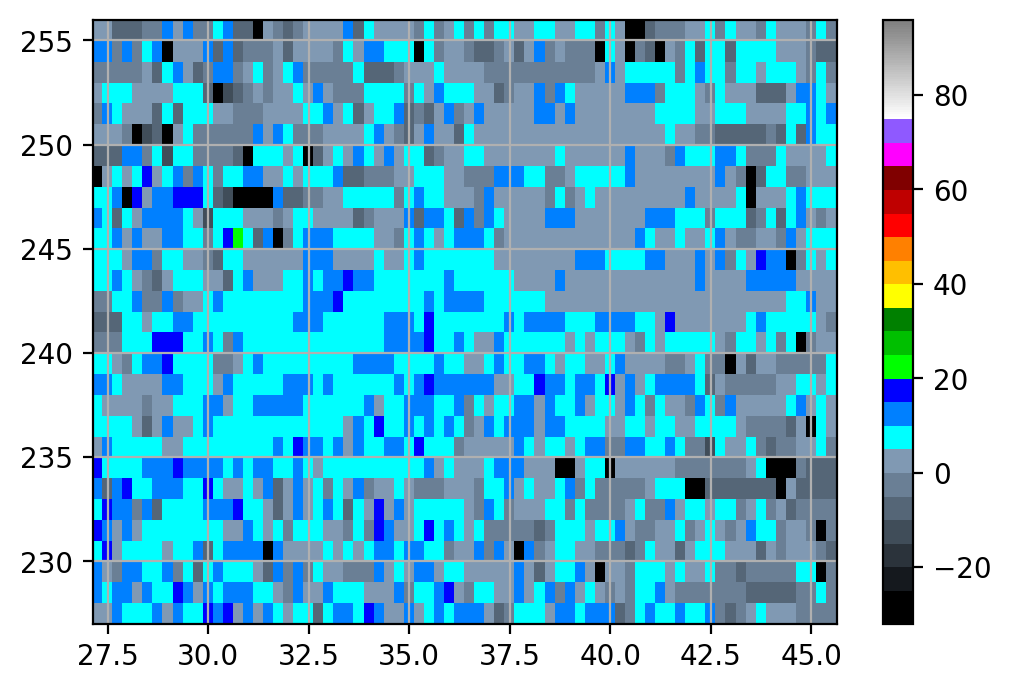

In [6]:
ia_sub = np.arange(227, 257)
ir_sub = np.arange(100, 175)

plt.figure(dpi=200)
plt.pcolormesh(ir_sub, ia_sub, z_rolled[ia_sub, :][:, ir_sub], cmap=cmap)
plt.plot(cells[:, 1] + 0.5, cells[:, 0] + 0.5, 'xw', markersize=4)
plt.clim((-32, 96))
plt.colorbar()
plt.grid()

plt.figure(dpi=200)
plt.pcolormesh(rr[ir_sub], ia_sub, z_interp[ia_sub, :][:, ir_sub], cmap=cmap)
plt.clim((-32, 96))
plt.colorbar()
plt.grid()